In [21]:
import numpy as np
import pandas as pd

In [14]:
import yfinance as yf

msft = yf.Ticker("^N225") #Выбираем тикер

# get historical market data
hist = msft.history(start='2010-05-06', end = '2010-12-01') #Выбираем период

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-05-06 00:00:00+09:00,10847.900391,10847.900391,10682.610352,10695.690430,183800000,0.0,0.0
2010-05-07 00:00:00+09:00,10472.700195,10472.769531,10257.320312,10364.589844,227700000,0.0,0.0
2010-05-10 00:00:00+09:00,10399.049805,10540.519531,10362.339844,10530.700195,181000000,0.0,0.0
2010-05-11 00:00:00+09:00,10643.240234,10643.280273,10392.469727,10411.099609,196900000,0.0,0.0
2010-05-12 00:00:00+09:00,10465.030273,10501.719727,10345.190430,10394.030273,189300000,0.0,0.0
...,...,...,...,...,...,...,...
2010-11-24 00:00:00+09:00,9942.540039,10064.309570,9904.919922,10030.110352,150100000,0.0,0.0
2010-11-25 00:00:00+09:00,10117.849609,10123.269531,10038.790039,10079.759766,133800000,0.0,0.0
2010-11-26 00:00:00+09:00,10078.089844,10134.639648,10039.559570,10039.559570,115800000,0.0,0.0


<Axes: xlabel='Date'>

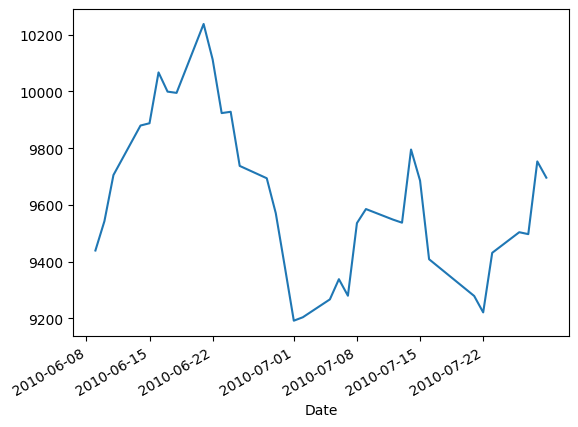

In [31]:
hist.iloc[24:59].Close.plot()

In [23]:
hist['t'] = np.arange(1,len(hist)+1)

In [57]:
from gekko import GEKKO    
import sklearn.metrics
#Начальные параметры
t = hist['t'].values
y = hist['Close'].values

m = GEKKO() # create model
m.options.SOLVER=1


#Изменяемые значения
a = m.Var(value = 1)
b = m.Var(value = 0)
d = m.Var(value = 1)
w = m.Var(value = 0.5)
f = m.Var(value = 1)
#Целевая функция = sum(e^2) -> min
obj = 0
for i in range(23,58):
    obj = obj + (y[i] - (a+b*t[i]+d*m.sin(t[i]*w+f)))**2
    #+d2[i]*m.sin(t[j]*w2[i]+f2[i])+d3[i]*m.sin(t[j]*w3[i]+f3[i])))**2)
m.Minimize(obj) #целевая фунция
m.solve() 

apm 213.87.139.26_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              5
 Number of total equations: -            0
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              5
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.73025E+19  0.00000E+00
    1  8.05531E+17  0.00000E+00
    2  2.07611E+08  0.00000E+00
  

In [58]:
a, b, d, w, f

([10146.661784],
 [-12.843809129],
 [38.161976538],
 [-20.153497608],
 [0.041922242774])

In [43]:
data = hist.iloc[22:57, :]

In [46]:
data['Y^'] = a.value[0]+b.value[0]*data['t']+d.value[0]*np.sin(w.value[0]*data['t']+f.value[0])

/var/folders/d7/6p__2hvj39l5ph8mdpjb3lkr0000gn/T/ipykernel_97831/13366468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Y^'] = a.value[0]+b.value[0]*data['t']+d.value[0]*np.sin(w.value[0]*data['t']+f.value[0])


In [47]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,t,Y^
Date,,,,,,,,,
2010-06-07 00:00:00+09:00,9705.360352,9714.419922,9502.620117,9520.799805,148400000,0.0,0.0,23,9620.510972
2010-06-08 00:00:00+09:00,9448.790039,9587.650391,9434.809570,9537.940430,129600000,0.0,0.0,24,9617.486326
2010-06-09 00:00:00+09:00,9475.570312,9487.910156,9378.230469,9439.129883,141600000,0.0,0.0,25,9639.952560
2010-06-10 00:00:00+09:00,9476.780273,9544.040039,9437.469727,9542.650391,116500000,0.0,0.0,26,9684.050115
2010-06-11 00:00:00+09:00,9701.320312,9764.730469,9673.599609,9705.250000,222400000,0.0,0.0,27,9743.790969
2010-06-14 00:00:00+09:00,9824.929688,9882.049805,9819.950195,9879.849609,97300000,0.0,0.0,28,9811.647836
2010-06-15 00:00:00+09:00,9845.650391,9911.730469,9826.440430,9887.889648,101700000,0.0,0.0,29,9879.294841
2010-06-16 00:00:00+09:00,10043.099609,10109.860352,10033.240234,10067.150391,120300000,0.0,0.0,30,9938.426755
2010-06-17 00:00:00+09:00,10009.250000,10053.450195,9989.209961,9999.400391,97600000,0.0,0.0,31,9981.576212


In [48]:
hist['Y^'] = a.value[0]+b.value[0]*hist['t']+d.value[0]*np.sin(w.value[0]*hist['t']+f.value[0])

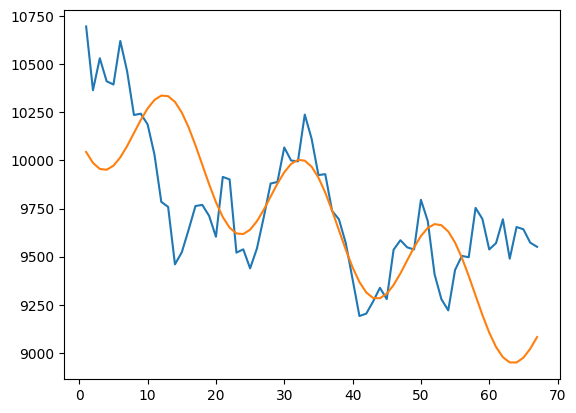

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,68), hist.Close.values[:67])
plt.plot(np.arange(1,68),hist['Y^'].values[:67])